In [203]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [204]:
# Cargar datos
df = pd.read_csv("Dataset_Peliculas.csv") 

# Vista general
df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [205]:
## 💡 Franja 2: Conversión directa de columnas tipo JSON a estructuras Python, incluyendo 'keywords'
# Objetivo: Reemplazar las columnas que contienen listas codificadas como strings JSON, incluyendo 'keywords'

import json

# Lista de columnas que contienen datos en formato string con listas de diccionarios
columnas_json = [
    'spoken_languages', 
    'genres', 
    'production_companies', 
    'production_countries',
    'keywords'  # ✅ Añadido correctamente
]

def convertir_a_lista(diccionario_str):
    """
    Convierte una cadena de texto en formato lista de diccionarios a su representación en Python.
    Reemplaza comillas simples por dobles y maneja errores de decodificación.
    """
    if pd.isnull(diccionario_str) or diccionario_str.strip() == '':
        return []
    try:
        return json.loads(diccionario_str.replace("'", '"'))
    except json.JSONDecodeError:
        # Opcional: imprimir o registrar valores que fallan
        # print("Error al decodificar:", diccionario_str)
        return []

# Aplicamos la conversión directamente a cada columna
for col in columnas_json:
    df[col] = df[col].apply(convertir_a_lista)

# 💡 Franja 3: Transformación de la columna 'keywords' para conservar solo los nombres
# Objetivo: Reemplazar cada fila con una lista de nombres de palabras clave (sin diccionarios)

# Asegurarse de que todos los elementos sean listas de diccionarios primero
df['spoken_language_names'] = df['spoken_languages'].apply(lambda langs: [lang['name'] for lang in langs])
df['genre_names'] = df['genres'].apply(lambda genres: [genre['name'] for genre in genres])
df['production_company_names'] = df['production_companies'].apply(lambda comps: [comp['name'] for comp in comps])
df['production_country_names'] = df['production_countries'].apply(lambda countries: [country['name'] for country in countries])

# 💡 Franja: Transformación de la columna 'status' a valores numéricos y limpieza
# Objetivo: Mapear estados específicos a valores enteros y eliminar los estados no reconocidos

df = df[df['status'] == 'Released'].copy()

# Verificamos resultados
print("✅ Distribución de estados codificados:")
print(df['status'].value_counts())

# Asegurarse de que la columna esté en formato datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Extraer el año
df['release_date'] = df['release_date'].dt.year

# Verificamos el resultado
df.head(10)



✅ Distribución de estados codificados:
status
Released    4795
Name: count, dtype: int64


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,spoken_language_names,genre_names,production_company_names,production_country_names
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[English, Español]","[Action, Adventure, Fantasy, Science Fiction]","[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]"
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,[],en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,[English],"[Adventure, Fantasy, Action]","[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America]
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[Français, English, Español, Italiano, Deutsch]","[Action, Adventure, Crime]","[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]"
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,[English],"[Action, Crime, Drama, Thriller]","[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America]
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,[English],"[Action, Adventure, Science Fiction]",[Walt Disney Pictures],[United States of America]
5,258000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",http://www.sonypictures.com/movies/spider-man3/,559,[],en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The battle within.,Spider-Man 3,5.9,3576,"[English, Français]","[Fantasy, Action, Adventure]","[Columbia Pictures, Laura Ziskin Productions, ...",[United States of America]
6,260000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{'id': 1562, 'name': 'hostage'}, {'id': 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330,[English],"[Animation, Family]","[Walt Disney Pictures, Walt Disney Animation S...",[United States of America]
7,280000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",h

In [206]:
df.drop(columns=['spoken_languages', 'genres', 'production_companies', 'production_countries', 'tagline', 'homepage', 'title', 'id', 'keywords', 'overview', 'status', 'original_language', 'original_title', 'spoken_language_names', 'genre_names', 'production_company_names', 'production_country_names'], inplace=True)
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4795 entries, 0 to 4802
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        4795 non-null   int64  
 1   popularity    4795 non-null   float64
 2   release_date  4794 non-null   float64
 3   revenue       4795 non-null   int64  
 4   runtime       4793 non-null   float64
 5   vote_average  4795 non-null   float64
 6   vote_count    4795 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 299.7 KB


,budget,popularity,release_date,revenue,runtime,vote_average,vote_count
0,237000000,150.437577,2009.0,2787965087,162.0,7.2,11800
1,300000000,139.082615,2007.0,961000000,169.0,6.9,4500
2,245000000,107.376788,2015.0,880674609,148.0,6.3,4466
3,250000000,112.312950,2012.0,1084939099,165.0,7.6,9106
4,260000000,43.926995,2012.0,284139100,132.0,6.1,2124


In [207]:
# 💡 Franja 4 (versión conservadora): Imputación de valores cero en lugar de eliminar registros
# Objetivo: Conservar el mayor número de registros imputando valores donde sea razonable


df['runtime'].fillna(df['runtime'].median(), inplace=True)
df['runtime'] = df['runtime'].replace(0, df['runtime'].median())

# Mostramos valores después de imputación
print("✅ Después de imputar:")
for col in ['budget', 'revenue', 'runtime']:
    ceros = (df[col] == 0).sum()
    print(f"{col}: {ceros} ceros restantes")



✅ Después de imputar:
budget: 1032 ceros restantes
revenue: 1420 ceros restantes
runtime: 0 ceros restantes


In [208]:
# 💡 Franja extra: Verificar la relación entre valores cero en 'budget' y 'revenue'

# Películas con presupuesto = 0
mask_budget_0 = df['budget'] == 0
# Películas con ingresos = 0
mask_revenue_0 = df['revenue'] == 0

# Total con presupuesto = 0
total_budget_0 = mask_budget_0.sum()
# Total con revenue = 0
total_revenue_0 = mask_revenue_0.sum()
# Total donde ambos son 0
total_ambos_0 = (mask_budget_0 & mask_revenue_0).sum()
# Casos distintos
solo_budget_0 = (mask_budget_0 & ~mask_revenue_0).sum()
solo_revenue_0 = (mask_revenue_0 & ~mask_budget_0).sum()

print("🔍 Análisis cruzado de ceros:")
print(f"Películas con budget = 0           : {total_budget_0}")
print(f"Películas con revenue = 0          : {total_revenue_0}")
print(f"Películas con ambos = 0            : {total_ambos_0}")
print(f"Películas con solo budget = 0      : {solo_budget_0}")
print(f"Películas con solo revenue = 0     : {solo_revenue_0}")


🔍 Análisis cruzado de ceros:
Películas con budget = 0           : 1032
Películas con revenue = 0          : 1420
Películas con ambos = 0            : 885
Películas con solo budget = 0      : 147
Películas con solo revenue = 0     : 535


In [209]:
# 💡 Franja: Crear columna 'profit' (ganancia) con validación de ceros
# Objetivo: Calcular revenue - budget solo cuando ambos valores son mayores a cero

def calcular_ganancia(row):
    if row['budget'] > 0 and row['revenue'] > 0:
        return row['revenue'] - row['budget']
    else:
        return 0

df['profit'] = df.apply(calcular_ganancia, axis=1)

# Verificamos
df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 4795 entries, 0 to 4802
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        4795 non-null   int64  
 1   popularity    4795 non-null   float64
 2   release_date  4794 non-null   float64
 3   revenue       4795 non-null   int64  
 4   runtime       4795 non-null   float64
 5   vote_average  4795 non-null   float64
 6   vote_count    4795 non-null   int64  
 7   profit        4795 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 337.1 KB


,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,profit
0,237000000,150.437577,2009.0,2787965087,162.0,7.2,11800,2.550965e+09
1,300000000,139.082615,2007.0,961000000,169.0,6.9,4500,6.610000e+08
2,245000000,107.376788,2015.0,880674609,148.0,6.3,4466,6.356746e+08
3,250000000,112.312950,2012.0,1084939099,165.0,7.6,9106,8.349391e+08
4,260000000,43.926995,2012.0,284139100,132.0,6.1,2124,2.413910e+07


c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 640x480 with 0 Axes>

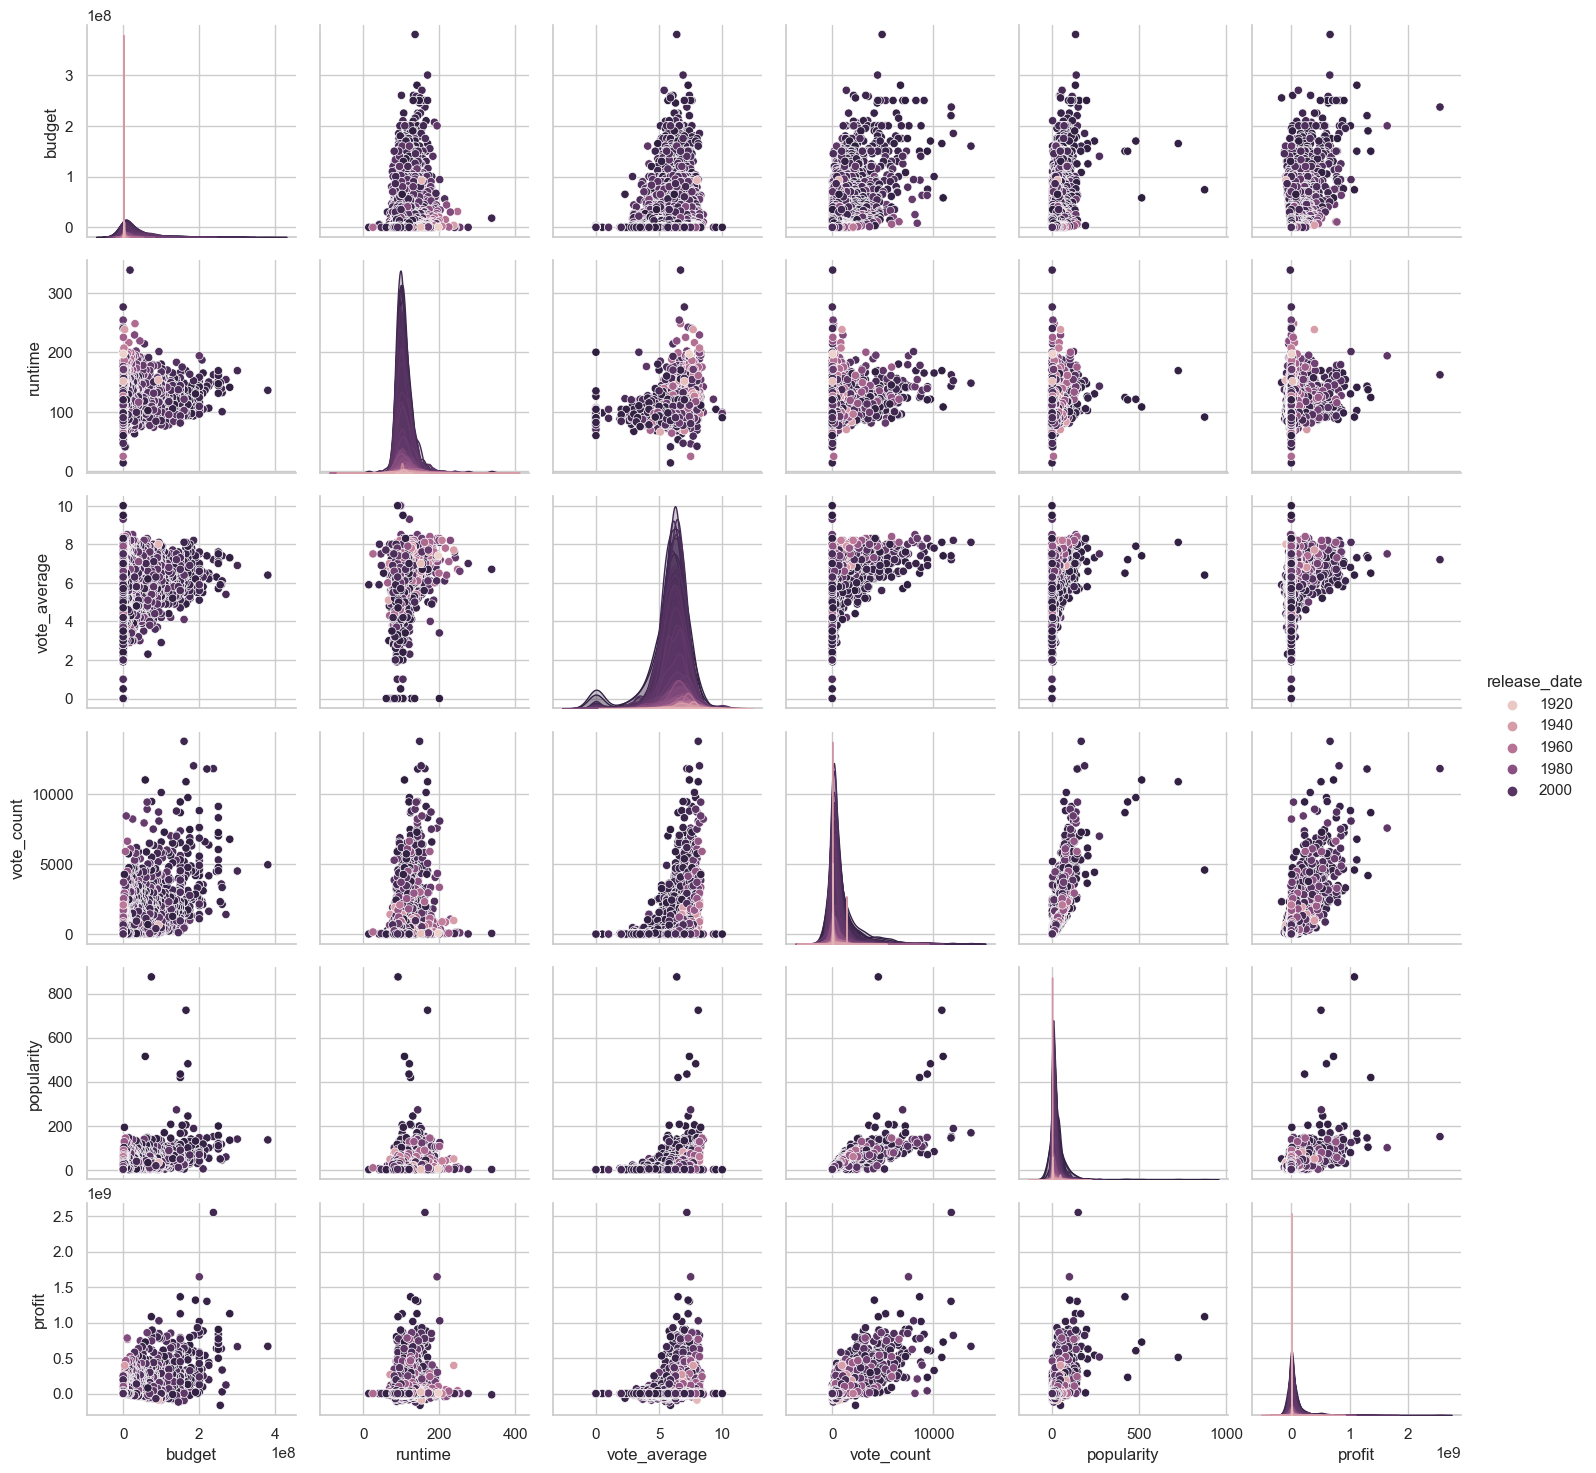

In [210]:
# graficar algunas características
plot = ['budget', 'runtime', 'vote_average', 'vote_count', 'popularity', 'profit', 'release_date']
plt.figure()
sns.pairplot(df[plot], hue= "release_date")
#Taking hue 
plt.show()

<Axes: >

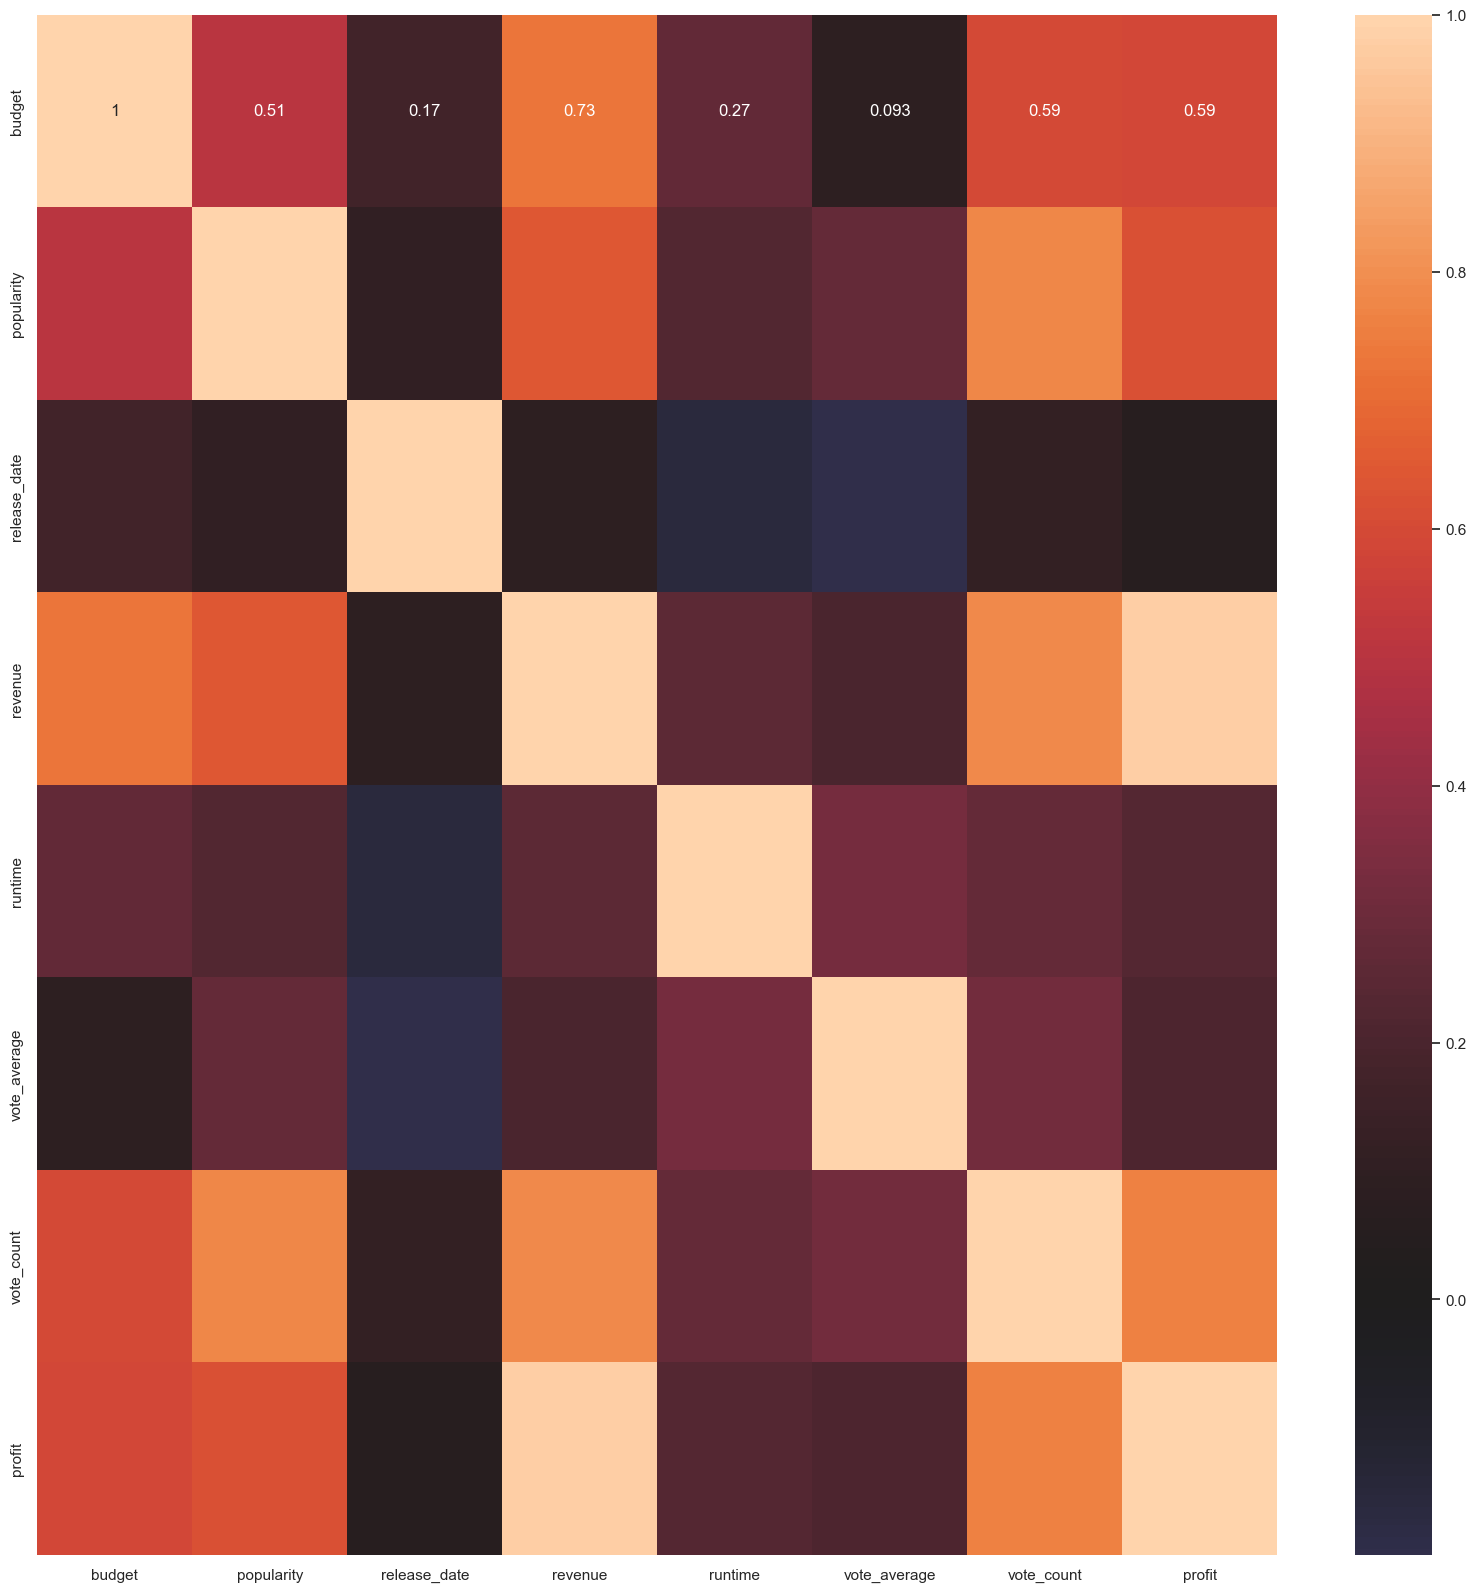

In [211]:
corrmat= df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, center=0)

In [212]:
# 💡 Franja: Escalamiento de variables numéricas con StandardScaler
# Objetivo: Estandarizar datos numéricos para clustering y reducción de dimensionalidad

from sklearn.preprocessing import StandardScaler

# Variables numéricas a escalar
variables_escaladas = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count', 'popularity', 'profit']

# Filtramos solo las películas con datos válidos en presupuesto e ingresos
df_cluster = df[(df['budget'] > 0) & (df['revenue'] > 0)].copy()

# Inicializamos el escalador
scaler = StandardScaler()

# Aplicamos el escalado y guardamos en un nuevo DataFrame
X_scaled = scaler.fit_transform(df_cluster[variables_escaladas])

# Creamos un DataFrame escalado con los mismos nombres de columnas
import pandas as pd
df_scaled = pd.DataFrame(X_scaled, columns=variables_escaladas, index=df_cluster.index)

# Verificamos resultado
df_scaled.info()
df_scaled.describe()
df_scaled.head()


<class 'pandas.core.frame.DataFrame'>
Index: 3228 entries, 0 to 4798
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        3228 non-null   float64
 1   revenue       3228 non-null   float64
 2   runtime       3228 non-null   float64
 3   vote_average  3228 non-null   float64
 4   vote_count    3228 non-null   float64
 5   popularity    3228 non-null   float64
 6   profit        3228 non-null   float64
dtypes: float64(7)
memory usage: 201.8 KB


,budget,revenue,runtime,vote_average,vote_count,popularity,profit
0,4.422772,14.314635,2.445669,1.019027,7.652633,3.356940,15.621155
1,5.841961,4.507575,2.779548,0.675664,2.490733,3.042941,3.670046
2,4.602986,4.076392,1.777911,-0.011063,2.466691,2.166182,3.509902
3,4.715620,5.172874,2.588760,1.476845,5.747680,2.302682,4.769942
4,4.940888,0.874218,1.014758,-0.239971,0.810640,0.411609,-0.357115
